# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

**17**

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:

# Check for missing values
print(df.isnull().sum())

# Examine data types and potential coercion needs
print(df.dtypes)

# Replace 999 with NaN and then handle missing values appropriately
df['pdays'].replace(999, pd.NA, inplace=True)


# Print updated data types
df.dtypes


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


<ipython-input-4-62d10a2a0f78>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pdays'].replace(999, pd.NA, inplace=True)


,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

**The business Objective is to find a model that determines if the client subscribes the deposit through a targeted marketing campaign.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           1515 non-null   object 
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

X  = df[['age', 'job', 'marital', 'education', 'duration', 'default', 'housing', 'loan']]
y = df['y']


numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(exclude=np.number).columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # Handle unknown categories

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fit and transform the features
X_encoded = preprocessor.fit_transform(X)

# Encode target variable (assuming 'yes'/'no' representation)
y_encoded = np.where(y == 'yes', 1, 0)

print(X_encoded.shape, y_encoded.shape)



(41188, 35) (41188,)


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32950, 35) (8238, 35) (32950,) (8238,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [8]:
baseline_accuracy = np.max(np.bincount(y_encoded)) / len(y_encoded)
print(f"Baseline accuracy: {baseline_accuracy:.4f}")


Baseline accuracy: 0.8873


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)



### Problem 9: Score the Model

What is the accuracy of your model?

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.8945


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [11]:

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time


# Model Comparison
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

results = []

for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time

    train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)

    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)

    results.append([model_name, train_time, train_accuracy, test_accuracy])

results_df = pd.DataFrame(results, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.054253,0.894052,0.894513
1,KNN,0.003485,0.911654,0.884924
2,Decision Tree,1.322128,0.998938,0.839524
3,SVM,42.155427,0.898088,0.895606


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric


If there was a gender feature and it showed no significant correlation with subscription rates (after careful analysis), then removing the feature would improve the model.
Removing an irrelevant or weakly correlated feature simplifies the model, reduces overfitting, and might enhance its generalizability.

Else, if there was a gender feature that demonstrated a clear association with the target variable (e.g., one gender subscribing at a higher rate than the other), then keeping it is crucial for improved model performance.



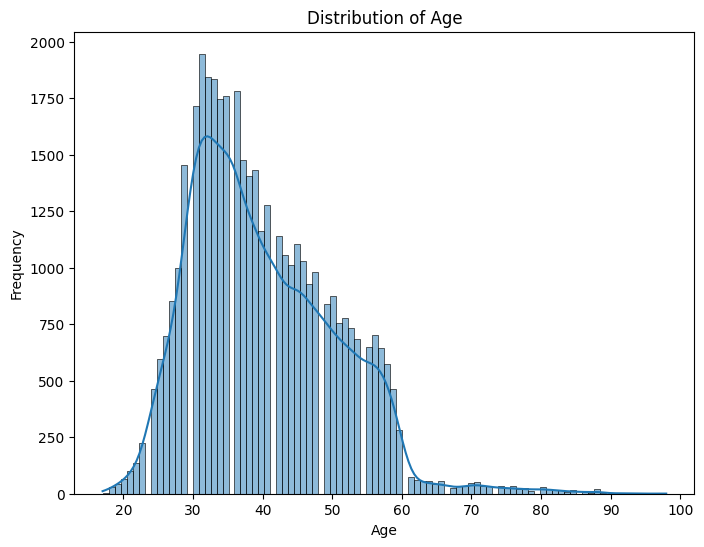

<Figure size 640x480 with 0 Axes>

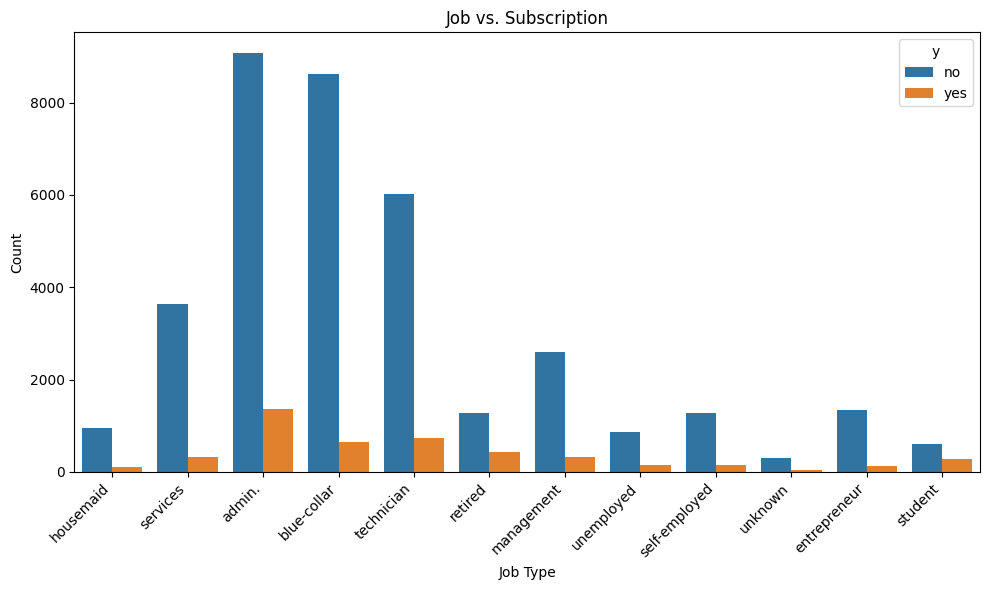

<Figure size 640x480 with 0 Axes>

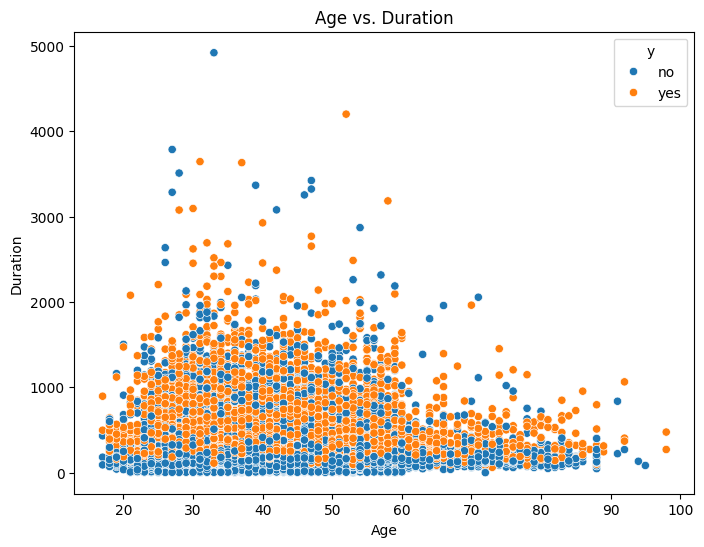

<Figure size 640x480 with 0 Axes>

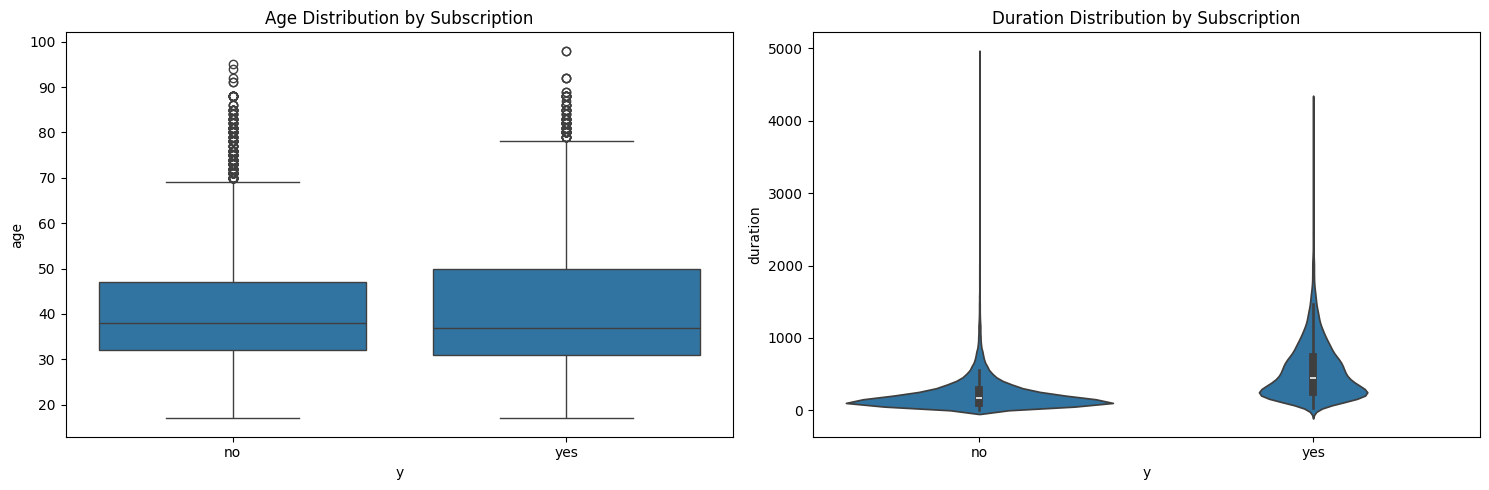

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


# Visualizing the distribution of 'age' (continuous)
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True)  # KDE for density estimation
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
plt.savefig('images/age_distribution.png')

# Visualizing the relationship between 'job' (categorical) and 'y' (target)
plt.figure(figsize=(10, 6))
sns.countplot(x='job', hue='y', data=df)
plt.title('Job vs. Subscription')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig('images/job_target.png')

# Visualizing the relationship between two continuous variables
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='duration', hue='y', data=df)
plt.title('Age vs. Duration')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.show()
plt.savefig('images/age_duration.png')

# Using subplots for multiple visualizations
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) # 1 row, 2 columns

sns.boxplot(x='y', y='age', data=df, ax=axes[0])
axes[0].set_title('Age Distribution by Subscription')

sns.violinplot(x='y', y='duration', data=df, ax=axes[1])
axes[1].set_title('Duration Distribution by Subscription')

plt.tight_layout()
plt.show()
plt.savefig('images/age_subscription.png')

In [13]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning for KNN

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # values for n_neighbors
    'weights': ['uniform', 'distance']  # values for weights
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5) # 5-fold cross-validation
knn_grid_search.fit(X_train, y_train)

print(f"Best KNN parameters: {knn_grid_search.best_params_}")
print(f"Best KNN score: {knn_grid_search.best_score_}")

# Hyperparameter Tuning for Decision Tree
tree_param_grid = {
    'max_depth': [None, 10, 20, 30], # values for max_depth
    'min_samples_split': [2, 5, 10], # values for min_samples_split
    'min_samples_leaf': [1, 2, 4] #  values for min_samples_leaf
}

tree_grid_search = GridSearchCV(DecisionTreeClassifier(), tree_param_grid, cv=5)
tree_grid_search.fit(X_train, y_train)

print(f"Best Decision Tree parameters: {tree_grid_search.best_params_}")
print(f"Best Decision Tree score: {tree_grid_search.best_score_}")



Best KNN parameters: {'n_neighbors': 9, 'weights': 'uniform'}
Best KNN score: 0.88752655538695
Best Decision Tree parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best Decision Tree score: 0.8898634294385432


In [14]:
# Hyperparameter tuning for SVM
svm_param_grid = {
    'C': [0.1, 1, 10], #  values for C
    'kernel': ['linear', 'rbf', 'poly'] #  values for kernel
}

svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)

print(f"Best SVM parameters: {svm_grid_search.best_params_}")
print(f"Best SVM score: {svm_grid_search.best_score_}")


# re-evaluate the models using the best parameters:
best_knn = knn_grid_search.best_estimator_
best_tree = tree_grid_search.best_estimator_
best_svm = svm_grid_search.best_estimator_

best_knn_accuracy = best_knn.score(X_test, y_test)
print(f"Best KNN Test Accuracy: {best_knn_accuracy:.4f}")

best_tree_accuracy = best_tree.score(X_test, y_test)
print(f"Best Decision Tree Test Accuracy: {best_tree_accuracy:.4f}")

best_svm_accuracy = best_svm.score(X_test, y_test)
print(f"Best SVM Test Accuracy: {best_svm_accuracy:.4f}")



Best SVM parameters: {'C': 1, 'kernel': 'rbf'}
Best SVM score: 0.8932321699544765
Best KNN Test Accuracy: 0.8911
Best Decision Tree Test Accuracy: 0.8952
Best SVM Test Accuracy: 0.8956


In [15]:


# Re-evaluate models with best parameters and F1-score

from sklearn.metrics import f1_score

best_models = {
    'Logistic Regression': logreg_model, # The original logreg model can also be used here
    'KNN': best_knn,
    'Decision Tree': best_tree,
    'SVM': best_svm
}

results_with_f1 = []

for model_name, model in best_models.items():
    start_time = time.time()
    # model.fit(X_train, y_train) # Already fitted during grid search, so no need to fit again.
    end_time = time.time()
    train_time = end_time - start_time

    y_pred_train = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)

    y_pred_test = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)

    results_with_f1.append([model_name, train_time, train_accuracy, test_accuracy, train_f1, test_f1])


results_f1_df = pd.DataFrame(results_with_f1, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy', 'Train F1', 'Test F1'])
results_f1_df




,Model,Train Time,Train Accuracy,Test Accuracy,Train F1,Test F1
0,Logistic Regression,7.152557e-07,0.894052,0.894513,0.286532,0.302008
1,KNN,1.192093e-06,0.903369,0.891114,0.394447,0.323019
2,Decision Tree,9.536743e-07,0.906191,0.895242,0.454754,0.401940
3,SVM,9.536743e-07,0.898088,0.895606,0.294834,0.278523


##### Questions